# 01 - Exploratory Data Analysis

Stage 0 of the critique detection pipeline: load, validate, profile, and
visualize the YouTube comment dataset.

In [3]:
import sys
sys.path.insert(0, '..')

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from src.data_ingest import ingest, profile_data, save_profile
from src.preprocess import preprocess_dataframe

## Load and Validate Data

In [5]:
# Update this path to your input file
DATA_PATH = '../../data/raw/comments.json'  # or .csv / .json

df = ingest(DATA_PATH)
profile = df.attrs.get('profile', profile_data(df))
print(f"Loaded {len(df)} comments")
print(f"\nProfile summary:")
for k, v in profile.items():
    if not isinstance(v, dict):
        print(f"  {k}: {v}")

[2026-02-17 16:52:38] src.data_ingest INFO: Ingesting comments.json  (format=json)
[2026-02-17 16:52:39] src.data_ingest INFO: Loaded JSON  rows=209049
[2026-02-17 16:52:39] src.data_ingest INFO: Applying field aliases: {'cid': 'comment_id', 'votes': 'like_count', 'time_parsed': 'published_at'}
[2026-02-17 16:52:39] src.data_ingest INFO: Optional column 'video_id' not present; filling with None.
[2026-02-17 16:52:39] src.data_ingest INFO: Optional column 'language' not present; filling with None.
[2026-02-17 16:52:40] src.data_ingest INFO: 14074 rows contain emoji-only text.
[2026-02-17 16:52:43] src.data_ingest INFO: Schema validation complete.  209049 valid rows retained.
[2026-02-17 16:52:43] src.data_ingest INFO: Profiling complete: 209049 rows, 0 nulls in text, 0 duplicates.
[2026-02-17 16:52:43] src.data_ingest INFO: Ingestion complete: 209049 rows ingested from comments.json.
[2026-02-17 16:52:44] src.data_ingest INFO: Profiling complete: 209049 rows, 0 nulls in text, 0 duplicat

Loaded 209049 comments

Profile summary:
  row_count: 209049
  duplicate_comment_ids: 0
  empty_text_count: 0
  emoji_only_count: 14074


## Preprocess

In [6]:
df = preprocess_dataframe(df)
print(f"Columns: {list(df.columns)}")
df.head()

Columns: ['comment_id', 'text', 'video_id', 'like_count', 'published_at', 'language', '_empty_text', '_emoji_only', 'raw_text', 'clean_text', 'is_trivial', 'text_length', 'word_count', 'punctuation_ratio', 'caps_ratio', 'emoji_count', 'exclamation_count', 'question_mark_count']


,comment_id,text,video_id,like_count,published_at,language,_empty_text,_emoji_only,raw_text,clean_text,is_trivial,text_length,word_count,punctuation_ratio,caps_ratio,emoji_count,exclamation_count,question_mark_count
0,UgwUx9K_ayf25j0vmyR4AaABAg,SUPER BOWL BABY,None,2000,1770666630.496059,unknown,False,False,SUPER BOWL BABY,SUPER BOWL BABY,False,15,3,0.0000,1.0000,0,0,0
1,UgzCAM0yqjHtwb24xD14AaABAg,anyone here because lady gaga performed die wi...,None,1600,1770666630.496786,unknown,False,False,anyone here because lady gaga performed die wi...,anyone here because lady gaga performed die wi...,False,74,14,0.0000,0.0000,0,0,0
2,UgxccWOpZ2W-BhYHxBh4AaABAg,Real music is COMING BACK 😭🙏🏽,None,25000,1739303430.49745,unknown,False,False,Real music is COMING BACK 😭🙏🏽,Real music is COMING BACK 😭🙏🏽,False,29,6,0.0000,0.5238,2,0,0
3,UgwzP_mXRg6CZ-DZgiV4AaABAg,"Drops a banger, disappears for two years, come...",None,53000,1739303430.498081,unknown,False,False,"Drops a banger, disappears for two years, come...","Drops a banger, disappears for two years, come...",False,101,18,0.0495,0.0260,2,0,0
4,Ugxudk1MvlJFISWnzGd4AaABAg,i love how gaga manages to look like a new per...,None,31000,1739303430.498846,unknown,False,False,i love how gaga manages to look like a new per...,i love how gaga manages to look like a new per...,False,65,13,0.0000,0.0000,0,0,0


## Text Length Distribution

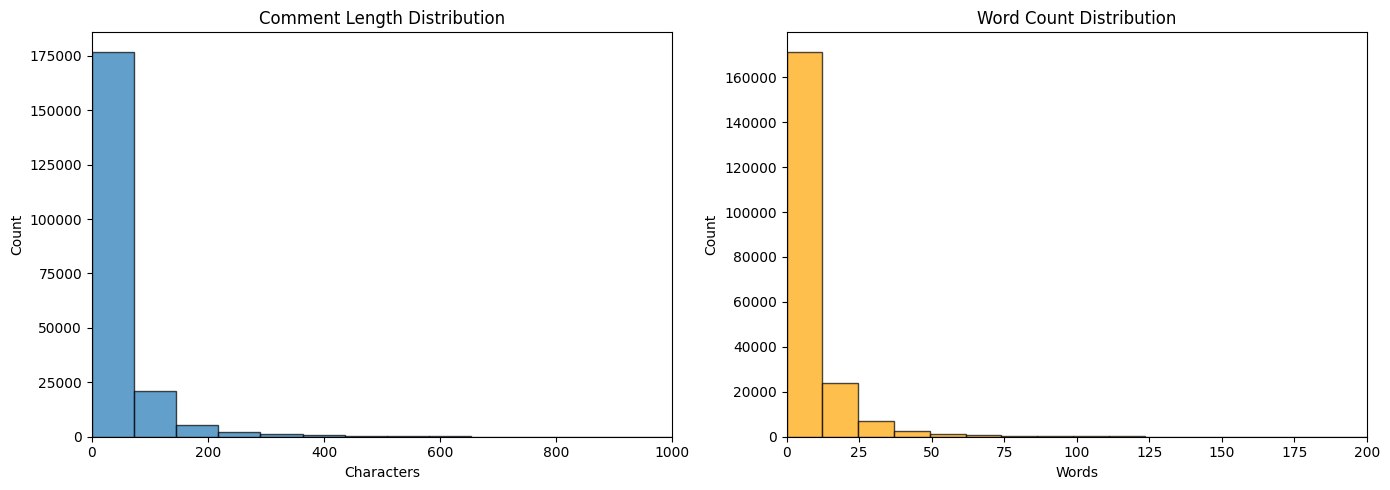

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['text_length'], bins=100, edgecolor='black', alpha=0.7)
axes[0].set_title('Comment Length Distribution')
axes[0].set_xlabel('Characters')
axes[0].set_ylabel('Count')
axes[0].set_xlim(0, 1000)

axes[1].hist(df['word_count'], bins=100, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Word Count Distribution')
axes[1].set_xlabel('Words')
axes[1].set_ylabel('Count')
axes[1].set_xlim(0, 200)

plt.tight_layout()
plt.show()

## Language Distribution

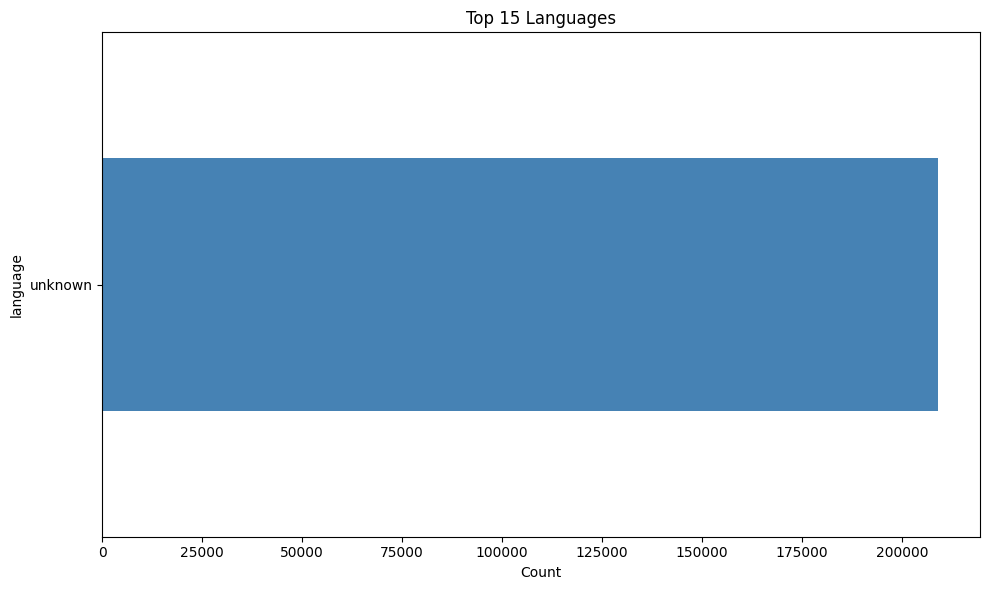

In [8]:
lang_counts = df['language'].value_counts().head(15)
lang_counts.plot(kind='barh', figsize=(10, 6), color='steelblue')
plt.title('Top 15 Languages')
plt.xlabel('Count')
plt.tight_layout()
plt.show()

## Feature Correlations

In [9]:
feature_cols = ['text_length', 'word_count', 'punctuation_ratio', 'caps_ratio',
                'emoji_count', 'exclamation_count', 'question_mark_count']
df[feature_cols].describe().round(3)

,text_length,word_count,punctuation_ratio,caps_ratio,emoji_count,exclamation_count,question_mark_count
count,209049.000,209049.000,209049.000,209049.000,209049.000,209049.000,209049.000
mean,44.636,8.708,0.033,0.137,0.942,0.192,0.079
std,105.576,20.156,0.076,0.221,2.618,0.939,0.442
min,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,8.000,1.000,0.000,0.012,0.000,0.000,0.000
50%,21.000,4.000,0.000,0.056,0.000,0.000,0.000
75%,48.000,9.000,0.040,0.143,1.000,0.000,0.000
max,7264.000,1234.000,1.000,1.000,164.000,123.000,22.000


## Trivial/Empty Comment Stats

In [10]:
if 'is_trivial' in df.columns:
    trivial_pct = df['is_trivial'].mean() * 100
    print(f"Trivial comments: {df['is_trivial'].sum()} ({trivial_pct:.1f}%)")
if '_emoji_only' in df.columns:
    emoji_pct = df['_emoji_only'].mean() * 100
    print(f"Emoji-only comments: {df['_emoji_only'].sum()} ({emoji_pct:.1f}%)")

Trivial comments: 30978 (14.8%)
Emoji-only comments: 14074 (6.7%)
